In [13]:
# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('./')) # or the path to your source code
sys.path.insert(0, module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Defining the Main Class

In [14]:
# extending the Indiviudal class to make space for the function
from individual_class import IndividualPSO

class Rosenbrock(IndividualPSO):
  def _fitness_function(self,X,a=1,b=100):
    x,y = X
    return pow((a - x),2) + b * pow((y - x**2),2)

def ff(X,a=1,b=100):
  x,y = X
  return (a - x)**2 + b*(y - x**2)**2

In [15]:
final_table = {}
final_fitness_table = {}
final_fitness_table["mini"] = {}
final_fitness_table["mean"] = {}

### 1. Você deve gerar uma implementação do algoritmo PSO e u3lizar a função de Rosenbroack com 2 dimensões para teste.

In [16]:
%reload_ext autoreload

<Figure size 1000x1000 with 0 Axes>

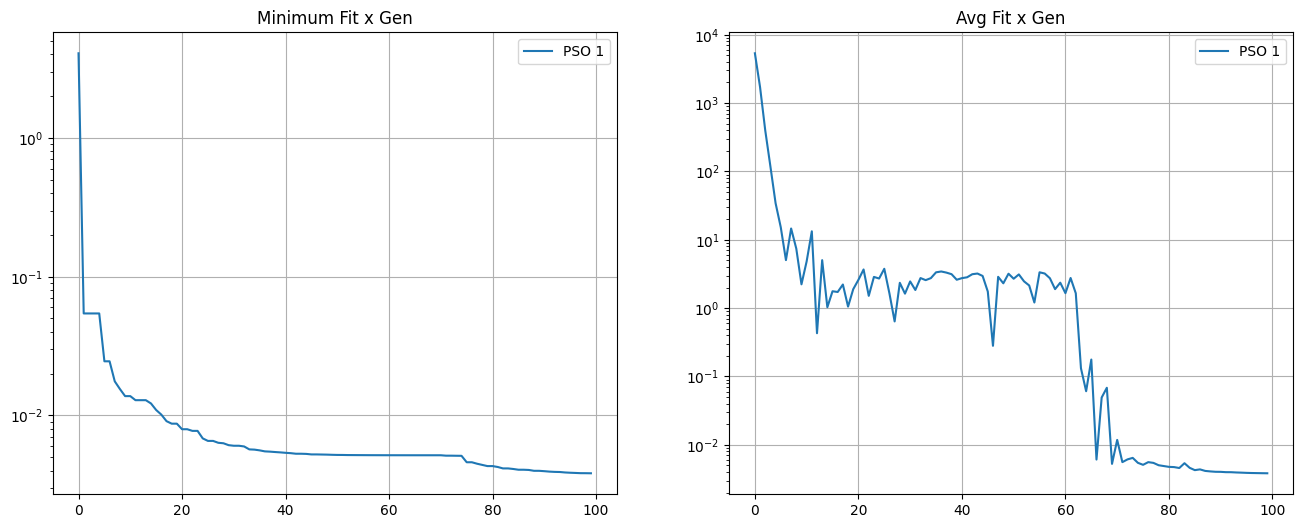

In [20]:
from graphical_visualization import get_last_best_ind
from graphical_visualization import store_average_fitness
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_generation

from algorithm_loop import particle_swarm_optimization
from algorithm_loop import initial_random_pop

c1_variable = 1
c2_variable = 1
w_variable = 0.4
bounds = [-5,5]
vbounds = [-1,1]
experiment_name="pso_2_bin"
option="PSO 1"

# initial and final pop stuff
population_size = 30
num_tests = 1 # number of tests to make
max_it = 100

final_table[option] = []
final_fitness_table["mini"][option] = []
final_fitness_table["mean"][option] = []

#------------------------------------------------------------#

lazy_title = [option,experiment_name,"C1 = "+str(c1_variable),"C2 = "+str(c2_variable),"W = "+str(w_variable)]
for _ in range(0,num_tests):
  coordinates = initial_random_pop(population_size,bounds)
  generation_data = particle_swarm_optimization(experiment_name,
                                                Rosenbrock,
                                                coordinates,
                                                max_it=max_it,
                                                C1=c1_variable,
                                                C2=c2_variable,
                                                w=w_variable,
                                                bounds=bounds,
                                                vbounds=vbounds)
  store_average_fitness(generation_data,final_fitness_table,option)

contour_over_population(generation_data,', '.join(lazy_title),ff,bounds)
plot_fitness_over_generation(final_fitness_table, num_tests)

from IPython.display import Video
Video("animation.mp4")